In [20]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from wrangle import wrangle_zillow

In [3]:
df = wrangle_zillow()

In [6]:
df.head(3)

,id,parcelid,bathroomcnt,bedroomcnt,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,...,transactiondate,propertylandusedesc,County,age,age_bin,acres,acres_bin,LA,Orange,Ventura
0,1727539,14297519,3.5,4.0,6059.0,33634931.0,-117869207.0,4506.0,122,261.0,...,2017-01-01,Single Family Residential,Orange County,19.0,0.133,0.103444,0.1,0,1,0
1,1387261,17052889,1.0,2.0,6111.0,34449266.0,-119281531.0,12647.0,1110,261.0,...,2017-01-01,Single Family Residential,Ventura County,50.0,0.333,0.290335,0.3,0,0,1
2,11677,14186244,2.0,3.0,6059.0,33886168.0,-117823170.0,8432.0,122,261.0,...,2017-01-01,Single Family Residential,Orange County,55.0,0.400,0.193572,0.2,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52030 entries, 0 to 52029
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         52030 non-null  int64  
 1   parcelid                   52030 non-null  int64  
 2   bathroomcnt                52030 non-null  float64
 3   bedroomcnt                 52030 non-null  float64
 4   fips                       52030 non-null  float64
 5   latitude                   52030 non-null  float64
 6   longitude                  52030 non-null  float64
 7   lotsizesquarefeet          52030 non-null  float64
 8   propertycountylandusecode  52030 non-null  object 
 9   propertylandusetypeid      52030 non-null  float64
 10  rawcensustractandblock     52030 non-null  float64
 11  roomcnt                    52030 non-null  float64
 12  yearbuilt                  52030 non-null  float64
 13  taxvaluedollarcnt          52030 non-null  flo

In [7]:

def train_validate_test_split(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, stratify=df.fips)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,  stratify=train_validate.fips)

    return train, validate, test

In [8]:
train, validate, test = train_validate_test_split(df)


train.shape, validate.shape, test.shape

((29136, 26), (12488, 26), (10406, 26))

In [9]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,...,transactiondate,propertylandusedesc,County,age,age_bin,acres,acres_bin,LA,Orange,Ventura
34264,2036202,12529787,4.0,4.0,6037.0,33770665.0,-118120850.0,6570.0,0101,261.0,...,2017-06-27,Single Family Residential,Los Angeles County,52.0,0.400,0.150826,0.2,1,0,0
8237,2883002,11848044,2.0,2.0,6037.0,34047118.0,-118135592.0,11051.0,0101,261.0,...,2017-02-24,Single Family Residential,Los Angeles County,65.0,0.466,0.253696,0.3,1,0,0
31640,2759592,17271234,2.0,3.0,6111.0,34168614.0,-118954733.0,15259.0,1111,261.0,...,2017-06-16,Single Family Residential,Ventura County,33.0,0.266,0.350298,0.3,0,0,1
14309,1044874,17266806,2.0,3.0,6111.0,34167209.0,-118938046.0,7422.0,1111,261.0,...,2017-03-30,Single Family Residential,Ventura County,46.0,0.333,0.170386,0.2,0,0,1
50710,2848400,17068575,4.0,3.0,6111.0,34359245.0,-119312477.0,162914.0,1110,261.0,...,2017-09-12,Single Family Residential,Ventura County,28.0,0.200,3.739991,0.5,0,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52030 entries, 0 to 52029
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         52030 non-null  int64  
 1   parcelid                   52030 non-null  int64  
 2   bathroomcnt                52030 non-null  float64
 3   bedroomcnt                 52030 non-null  float64
 4   fips                       52030 non-null  float64
 5   latitude                   52030 non-null  float64
 6   longitude                  52030 non-null  float64
 7   lotsizesquarefeet          52030 non-null  float64
 8   propertycountylandusecode  52030 non-null  object 
 9   propertylandusetypeid      52030 non-null  float64
 10  rawcensustractandblock     52030 non-null  float64
 11  roomcnt                    52030 non-null  float64
 12  yearbuilt                  52030 non-null  float64
 13  taxvaluedollarcnt          52030 non-null  flo

Variance of logerror for Los Angeles County.
0.02740415350675282
Variance of logerror for Orange County.
0.038419850345884216
Variance of logerror for Ventura County.
0.024150919610820307


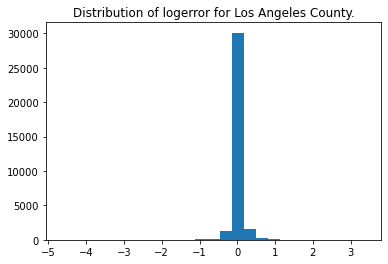

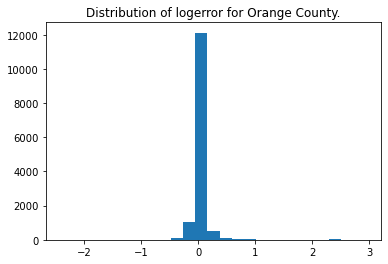

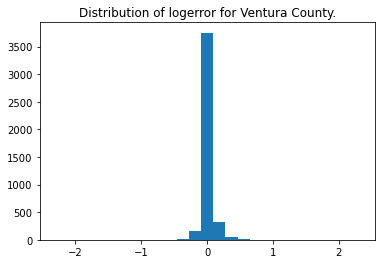

In [14]:
#Loop through my counties and plot the distribution of the target variable
county_list = ['Los Angeles County', 'Orange County', 'Ventura County']

for County in county_list:
    print('Variance of logerror for {}.'.format(County))
    print(df[df['County'] == County].logerror.var())
    
    plt.figure()
    plt.title('Distribution of logerror for {}.'.format(County))
    plt.hist(df[df['County'] == County].logerror, bins=25)

<AxesSubplot:xlabel='County', ylabel='logerror'>

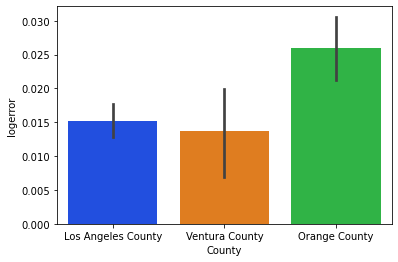

In [41]:
#Compare the average log error between counties
sns.barplot(x='County', y='logerror', data=train, palette= "bright")

## Question 1 - Is log error significantly different for properties in the three counties?

Null hypothesis: Log error will be the same across all three counties.
Alternative hypothesis: Log error will vary based on county.

In [23]:
#Conduct an ANOVA test between the counties
f_county, p_county = stats.f_oneway(df[df['County'] == 'Los Angeles County'].logerror,
                                    df[df['County'] == 'Orange County'].logerror,
                                    df[df['County'] == 'Ventura County'].logerror)

f_county, p_county

(22.500550909641934, 1.7074916354433785e-10)

In [25]:
#Compare my p value to alpha
alpha = 0.05
if p_county < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


## Question 2 - Is log error significantly different for properties that have diffrent bathroom counts 

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

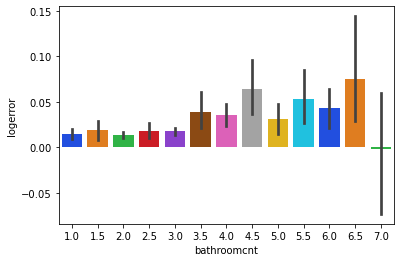

In [43]:
sns.barplot(x='bathroomcnt', y='logerror', data=train, palette= "bright")

## Question 3 - Is log error significantly different for properties that have diffrent bedroom counts

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

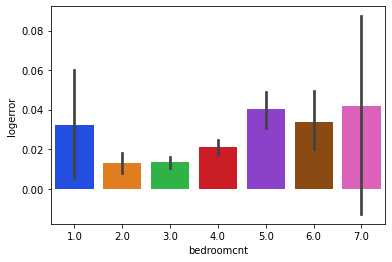

In [45]:
sns.barplot(x='bedroomcnt', y='logerror', data=train, palette= "bright")

## Question 4 -  Is log error significantly different for properties that have diffrent tax values

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

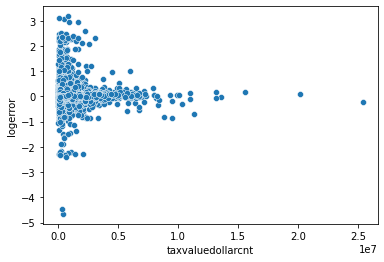

In [52]:
sns.scatterplot(x='taxvaluedollarcnt', y='logerror', data=train, palette= "bright")

Null hypothesis: There is no correlation between price and log error.
Alternative hypothesis: There is a relationship between price and log error.

In [53]:
#Test for correlation between the two
corr_value, p_value = stats.pearsonr(df['taxvaluedollarcnt'],
                                     df['logerror'])

corr_value, p_value

(-0.006149787116911295, 0.16069102565002474)

In [54]:
#Test my hypothesis
if p_value < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


## Scalign the data

In [56]:
pd.set_option('display.max_columns', None)
train.head()


,id,parcelid,bathroomcnt,bedroomcnt,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,logerror,transactiondate,propertylandusedesc,County,age,age_bin,acres,acres_bin,LA,Orange,Ventura
34264,2036202,12529787,4.0,4.0,6037.0,33770665.0,-118120850.0,6570.0,0101,261.0,6.037578e+07,0.0,1965.0,963045.0,2016.0,-0.005355,2017-06-27,Single Family Residential,Los Angeles County,52.0,0.400,0.150826,0.2,1,0,0
8237,2883002,11848044,2.0,2.0,6037.0,34047118.0,-118135592.0,11051.0,0101,261.0,6.037482e+07,0.0,1952.0,299104.0,2016.0,0.041482,2017-02-24,Single Family Residential,Los Angeles County,65.0,0.466,0.253696,0.3,1,0,0
31640,2759592,17271234,2.0,3.0,6111.0,34168614.0,-118954733.0,15259.0,1111,261.0,6.111006e+07,6.0,1984.0,263015.0,2016.0,0.072371,2017-06-16,Single Family Residential,Ventura County,33.0,0.266,0.350298,0.3,0,0,1
14309,1044874,17266806,2.0,3.0,6111.0,34167209.0,-118938046.0,7422.0,1111,261.0,6.111006e+07,6.0,1971.0,548830.0,2016.0,-0.019596,2017-03-30,Single Family Residential,Ventura County,46.0,0.333,0.170386,0.2,0,0,1
50710,2848400,17068575,4.0,3.0,6111.0,34359245.0,-119312477.0,162914.0,1110,261.0,6.111001e+07,7.0,1989.0,877934.0,2016.0,0.056052,2017-09-12,Single Family Residential,Ventura County,28.0,0.200,3.739991,0.5,0,0,1


## Clustering 

In [ ]:
first cluster - size= bed bath, sqft 

In [ ]:
second cluster - locations- log lat 

In [ ]:
third custer - year built and sqft 